<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/ML_Prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart-2.csv to heart-2.csv


In [4]:
df = pd.read_csv('heart-2.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Check for null values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


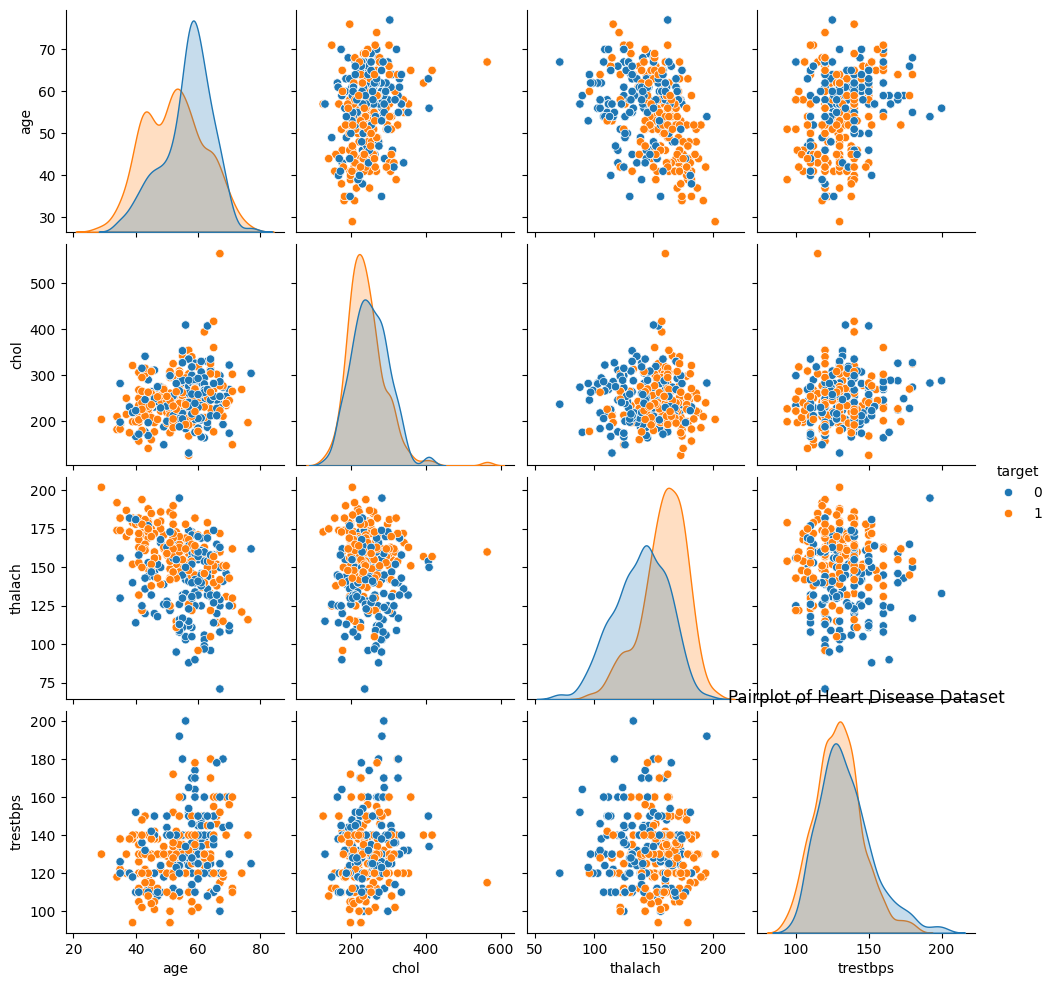

In [8]:
# Pairplot for relationships
selected_features = ['age', 'chol', 'thalach', 'trestbps', 'target']
sns.pairplot(df[selected_features], hue='target', diag_kind='kde')
plt.title("Pairplot of Heart Disease Dataset")
plt.show()

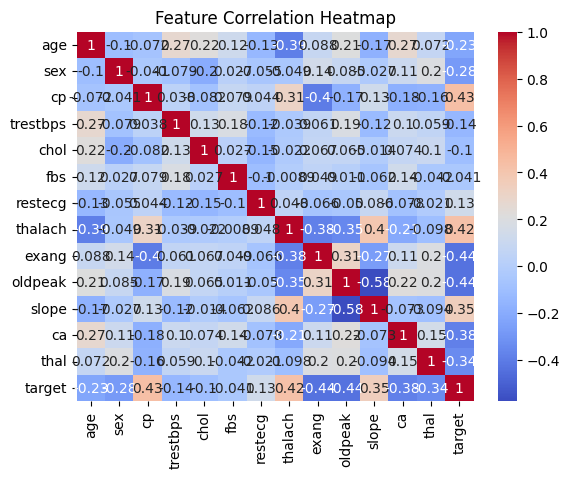

In [9]:
# Step 3: Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
# Step 4: TensorFlow Workflow
# Define features and target
X = df.drop('target', axis=1).values
Y = pd.get_dummies(df['target']).values

In [13]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Define the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(Y.shape[1], activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train and evaluate the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Model Loss = {loss:.4f}, Model Accuracy = {accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7656 - loss: 0.4492 
Model Loss = 0.4718, Model Accuracy = 0.7707


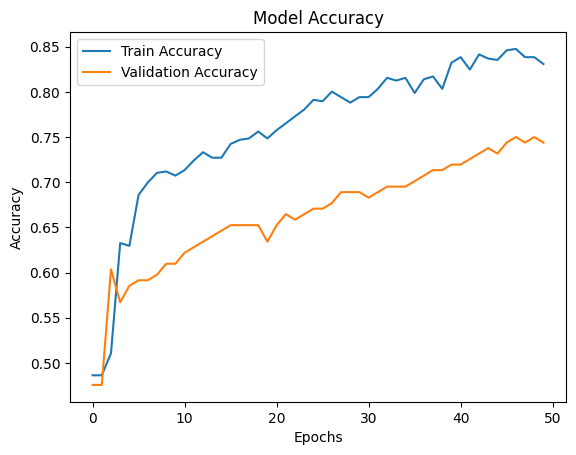

In [17]:
# Step 5: Visualize Model Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()